In [2]:
pip install requests pandas


Note: you may need to restart the kernel to use updated packages.


In [11]:
import requests
import pandas as pd
import os

API_KEY = '9511eda41a5d479c920151c51a273404'  
BASE_URL = 'https://api.football-data.org/v4/competitions/PL/matches'  

HEADERS = {'X-Auth-Token': API_KEY}

def fetch_recent_matches(limit=100):
    print("Fetching data...")
    all_matches = []
    page = 1

    while len(all_matches) < limit:
        response = requests.get(BASE_URL, headers=HEADERS, params={'page': page})
        if response.status_code != 200:
            print("Failed to fetch data. Status code:", response.status_code)
            break

        data = response.json()
        matches = data.get('matches', [])
        if not matches:
            break

        all_matches.extend(matches)
        page += 1

    print(f"Fetched {len(all_matches)} matches.")
    return all_matches[:limit]

def save_to_csv(matches):
    # Create the data directory if it doesn't exist
    os.makedirs('data', exist_ok=True)
    
    df = pd.DataFrame([{
        'match_id': m['id'],
        'date': m['utcDate'],
        'home_team': m['homeTeam']['name'],
        'away_team': m['awayTeam']['name'],
        'home_score': m['score']['fullTime']['home'],
        'away_score': m['score']['fullTime']['away']
    } for m in matches])

    df.to_csv('data/cleaned_matches.csv', index=False)
    print("Saved to data/cleaned_matches.csv")

if __name__ == "__main__":
    matches = fetch_recent_matches(1000)
    save_to_csv(matches)

Fetching data...
Fetched 1140 matches.
Saved to data/cleaned_matches.csv


In [13]:
import pandas as pd
df = pd.read_csv('data/cleaned_matches.csv')
df.head()


,match_id,date,home_team,away_team,home_score,away_score
0,537785,2025-08-15T19:00:00Z,Liverpool FC,AFC Bournemouth,NaN,NaN
1,537786,2025-08-16T11:30:00Z,Aston Villa FC,Newcastle United FC,NaN,NaN
2,537787,2025-08-16T14:00:00Z,Brighton & Hove Albion FC,Fulham FC,NaN,NaN
3,537788,2025-08-16T14:00:00Z,Nottingham Forest FC,Brentford FC,NaN,NaN
4,537789,2025-08-16T14:00:00Z,Sunderland AFC,West Ham United FC,NaN,NaN


In [21]:
import shutil


shutil.copy('data/cleaned_matches.csv', 'cleaned_matches.csv')


'cleaned_matches.csv'

In [19]:
from IPython.display import FileLink


FileLink('cleaned_matches.csv')


C:\Users\User\3D Objects\Python intern\cleaned_matches.csv

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style setup
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the cleaned data
# Corrected path - you need to provide the correct path to your CSV file
# Option 1: Use the correct relative path
df = pd.read_csv('data/cleaned_matches.csv')  # Removed the leading '../'

# Option 2: Or use an absolute path (uncomment and modify as needed)
# df = pd.read_csv('/full/path/to/cleaned_matches.csv')

# Option 3: If you're using a sample dataset for testing
# df = pd.read_csv('https://raw.githubusercontent.com/username/repo/main/data/cleaned_matches.csv')

df['date'] = pd.to_datetime(df['date'])
df.head()

,match_id,date,home_team,away_team,home_score,away_score
0,537785,2025-08-15 19:00:00+00:00,Liverpool FC,AFC Bournemouth,NaN,NaN
1,537786,2025-08-16 11:30:00+00:00,Aston Villa FC,Newcastle United FC,NaN,NaN
2,537787,2025-08-16 14:00:00+00:00,Brighton & Hove Albion FC,Fulham FC,NaN,NaN
3,537788,2025-08-16 14:00:00+00:00,Nottingham Forest FC,Brentford FC,NaN,NaN
4,537789,2025-08-16 14:00:00+00:00,Sunderland AFC,West Ham United FC,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   match_id    1000 non-null   int64              
 1   date        1000 non-null   datetime64[ns, UTC]
 2   home_team   1000 non-null   object             
 3   away_team   1000 non-null   object             
 4   home_score  0 non-null      float64            
 5   away_score  0 non-null      float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 47.0+ KB


In [45]:
df.describe()

,match_id,home_score,away_score
count,1000.000000,0.0,0.0
mean,537957.700000,NaN,NaN
std,105.840504,NaN,NaN
min,537785.000000,NaN,NaN
25%,537868.000000,NaN,NaN
50%,537951.000000,NaN,NaN
75%,538039.250000,NaN,NaN
max,538164.000000,NaN,NaN


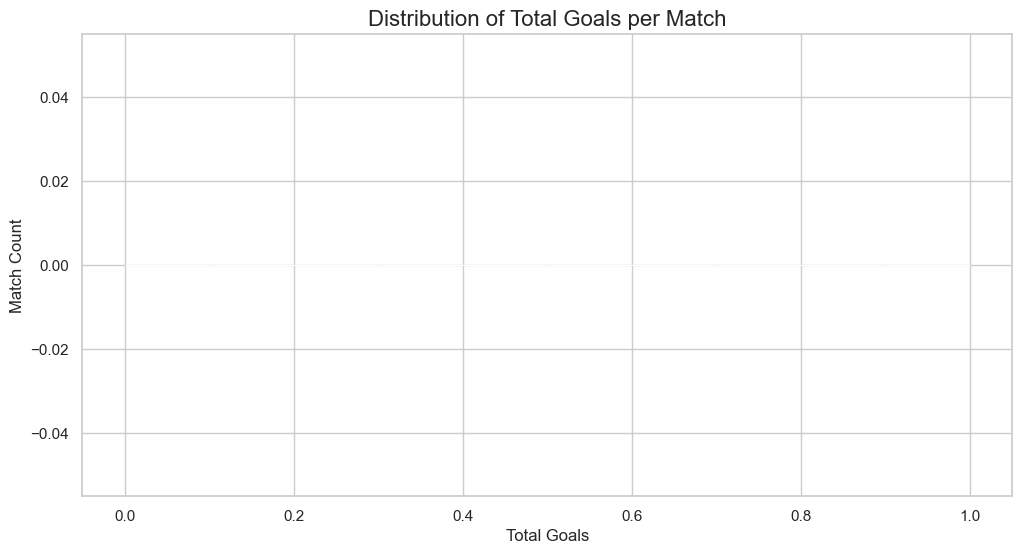

In [47]:
df['total_goals'] = df['home_score'] + df['away_score']
sns.histplot(df['total_goals'], bins=10, kde=True, color="mediumseagreen")
plt.title("Distribution of Total Goals per Match", fontsize=16)
plt.xlabel("Total Goals")
plt.ylabel("Match Count")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15276\2118007744.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_home.values, y=top_home.index, palette="Blues_d")


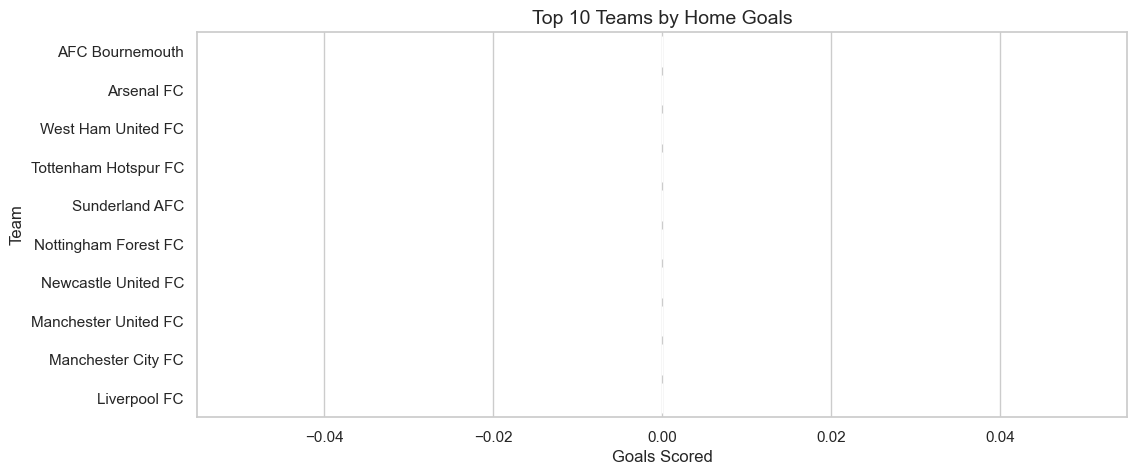

C:\Users\User\AppData\Local\Temp\ipykernel_15276\2118007744.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_away.values, y=top_away.index, palette="Oranges_d")


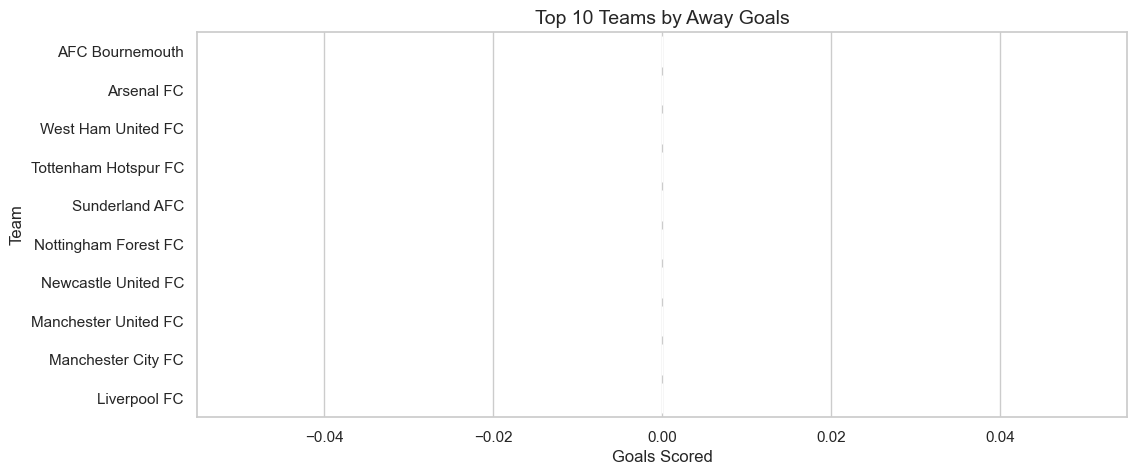

In [49]:
top_home = df.groupby('home_team')['home_score'].sum().sort_values(ascending=False).head(10)
top_away = df.groupby('away_team')['away_score'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_home.values, y=top_home.index, palette="Blues_d")
plt.title("Top 10 Teams by Home Goals", fontsize=14)
plt.xlabel("Goals Scored")
plt.ylabel("Team")
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=top_away.values, y=top_away.index, palette="Oranges_d")
plt.title("Top 10 Teams by Away Goals", fontsize=14)
plt.xlabel("Goals Scored")
plt.ylabel("Team")
plt.show()


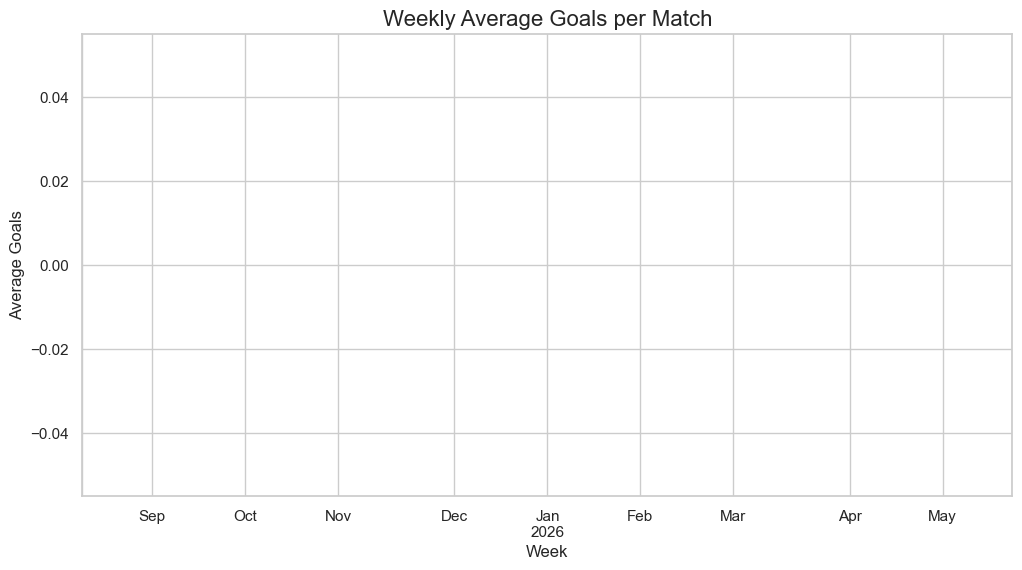

In [51]:
df.set_index('date')['total_goals'].resample('W').mean().plot(marker='o', color='slateblue')
plt.title("Weekly Average Goals per Match", fontsize=16)
plt.xlabel("Week")
plt.ylabel("Average Goals")
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15276\3435065951.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Home Goals", "Away Goals"], y=[home_avg, away_avg], palette="Set2")


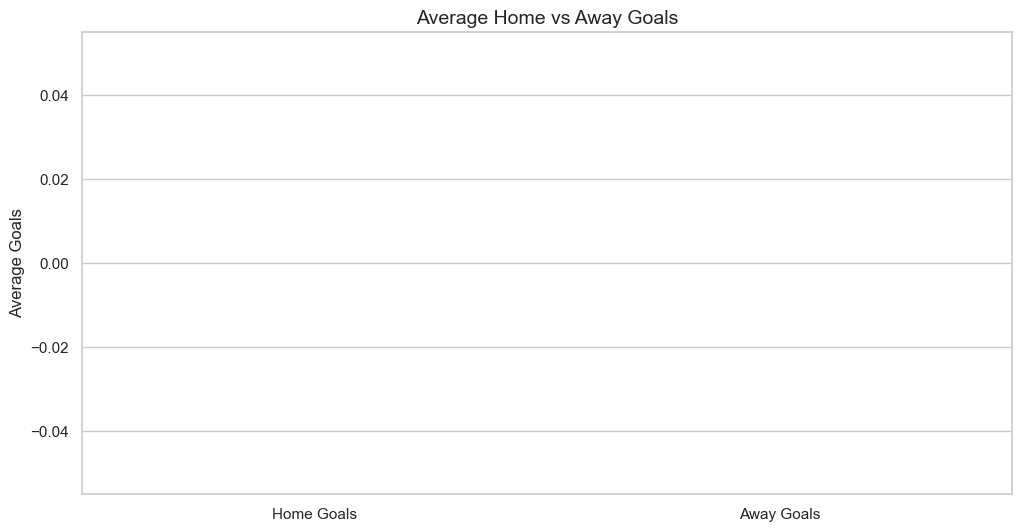

In [53]:
home_avg = df['home_score'].mean()
away_avg = df['away_score'].mean()

sns.barplot(x=["Home Goals", "Away Goals"], y=[home_avg, away_avg], palette="Set2")
plt.title("Average Home vs Away Goals", fontsize=14)
plt.ylabel("Average Goals")
plt.show()